<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" /> 
    
    
### <font color='navy'> Simulación matemática. 

**Nombres:** Santiago Reyes, Isabela Torres-Septien

**Fecha:** 15 de noviembre, 2023

**Expediente** : 745826, 
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: https://github.com/IsabelaTorres0/PM2_ReyesS_TorresI

# Proyecto Módulo 3




### 1.1 Tabla Amortización
> Calcularemos 3 diferentes escuelas, de las cuales queremos sacar un credito

### 1.2 Introducción
> En el siguiente codigo intentaremos determinar que escuela tiene el mayor credito. Un estudiante graduado de preparatoria quiere estudiar Ingenieria Industrial, se acaba de graduar y esta viendo a que Universidad entrar sin embargo, no puede pagarla sin un credito por lo que, esta buscando uno en las siguientes tres escuelas(Tec, Iteso y UP). Las cuales le ofrecieron el siguiente crédito.


### 1.3 Objetivos.
> - Hacer una tabla de amortización.
> - Calcular interés.
> - Simular la proyección del precio dado.
> #### 1.1 Objetivo general.
>  - Definir cual credito le combiene más al estudiante.
>  - Comparar cual credito es mejor

In [36]:
!conda install -c conda-forge yfinance -y

SyntaxError: invalid syntax (1651182941.py, line 2)

In [43]:
!conda install -c anaconda pandas-datareader -y
!pip install numpy-financial

Solving environment: ...working... done

# All requested packages already installed.



DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): repo.anaconda.com:443
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/main/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/noarch/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/r/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG:urllib3.connectionpool:https://repo.anaconda.com:443 "GET /pkgs/msys2/win-64/current_repodata.json HTTP/1.1" 304 0
DEBUG

In [66]:
#Importar librerias
import pandas as pd
import numpy as np
from datetime import date
import numpy_financial as npf

In [67]:
#Datos TEC
Interest_Rate = 0.05
Years = 20
Payments_Year = 12
Principal = 100000
Addl_Princ = 50
start_date = (date(2023,11,11))

#Calcular datos de la tabla
pmt = npf.pmt(Interest_Rate/Payments_Year, Years*Payments_Year, Principal)

In [69]:
# calcular periodo
per = 1

# Calcular interes
ipmt = npf.ipmt(Interest_Rate/Payments_Year, per, Years*Payments_Year, Principal)

# Calcular dato principal
ppmt = npf.ppmt(Interest_Rate/Payments_Year, per, Years*Payments_Year, Principal)

#print(ipmt, ppmt)

In [70]:
rng = pd.date_range(start_date, periods=Years * Payments_Year, freq='MS')
rng.name = "Payment_Date"

In [71]:
df = pd.DataFrame(index=rng,columns=['Payment', 'Principal', 'Interest', 'Addl_Principal', 'Balance'], dtype='float')
df.reset_index(inplace=True)
df.index += 1
df.index.name = "Period"

In [131]:
#Definir para la tabla
df["Payment"] = npf.pmt(Interest_Rate/Payments_Year, Years*Payments_Year, Principal)
df["Principal"] = npf.ppmt(Interest_Rate/Payments_Year, df.index, Years*Payments_Year, Principal)
df["Interest"] = npf.ipmt(Interest_Rate/Payments_Year, df.index, Years*Payments_Year, Principal)

# Convertir a negativos
df["Addl_Principal"] = -Addl_Princ
df = df.round(2)

#Codigo para definir
df["Cumulative_Principal"] = (df["Principal"] + df["Addl_Principal"]).cumsum()
df["Cumulative_Principal"] = df["Cumulative_Principal"].clip(lower=-Principal)
df["Curr_Balance"] = Principal + df["Cumulative_Principal"]

In [132]:
df.index += 1
df.index.name = "Cumulative_Principal"
df.index += 1
df.index.name = "Curr_Balance"
df["Cumulative_Principal"] = df["Cumulative_Principal"].clip(lower=-Principal)
#aqui solo estas poniendo como limite principal

df["Curr_Balance"] = Principal + df["Cumulative_Principal"]

In [133]:
#Dar valores del valance
last_payment = df.query("Curr_Balance <= 0")["Curr_Balance"].idxmax(axis=0, skipna=True)
df.loc[last_payment]

Payment_Date            2041-12-01 00:00:00
Payment                             -659.96
Principal                           -622.64
Interest                             -37.32
Addl_Principal                          -50
Balance                                 NaN
Cumulative_Principal              -100000.0
Curr_Balance                            0.0
Name: 229, dtype: object

In [118]:
df.loc[last_payment, "Principal"] = -(df.loc[last_payment-1, "Curr_Balance"])
df.loc[last_payment, "Payment"] = df.loc[last_payment, ["Principal", "Interest"]].sum()
df.loc[last_payment, "Addl_Principal"] = 0
df = df.loc[0:last_payment]

In [119]:
def amortization_table(interest_rate, years, payments_year, principal, addl_principal=0, start_date=date.today()):
    # poner negativos en addl_principal
    if addl_principal > 0:
        addl_principal = -addl_principal
    
    #crear index de fecha de pago
    rng = pd.date_range(start_date, periods=years * payments_year, freq='MS')
    rng.name = "Payment_Date"
    
    # Crear la amortización del data frame
    df = pd.DataFrame(index=rng,columns=['Payment', 'Principal', 'Interest', 
                                         'Addl_Principal', 'Curr_Balance'], dtype='float')
    
    # Incluir index al period (start at 1 not 0)
    df.reset_index(inplace=True)
    df.index += 1
    df.index.name = "Period"
    
    # Calcular payment, principal and interests amounts using built in Numpy functions
    per_payment = npf.pmt(interest_rate/payments_year, years*payments_year, principal)
    df["Payment"] = per_payment
    df["Principal"] = npf.ppmt(interest_rate/payments_year, df.index, years*payments_year, principal)
    df["Interest"] = npf.ipmt(interest_rate/payments_year, df.index, years*payments_year, principal)
        
    # Redondear
    df = df.round(2) 
    
     # Incluir pagos adicionales
    df["Addl_Principal"] = addl_principal
    
    # Asegurarse que el cumulative principal, no sea mayor al pago
    df["Cumulative_Principal"] = (df["Principal"] + df["Addl_Principal"]).cumsum()
    df["Cumulative_Principal"] = df["Cumulative_Principal"].clip(lower=-principal)
    
    # Calcular el balance en cada periodo
    df["Curr_Balance"] = principal + df["Cumulative_Principal"]
    
    # Determinar último pago
    try:
        last_payment = df.query("Curr_Balance <= 0")["Curr_Balance"].idxmax(axis=1, skipna=True)
    except ValueError:
        last_payment = df.last_valid_index()
    
    last_payment_date = "{:%m-%d-%Y}".format(df.loc[last_payment, "Payment_Date"])
        
    # Si tenemos pagos adicionales truncar la columna:
    if addl_principal != 0:
                
        # Quitar los pagos extra 
        df = df.loc[0:last_payment].copy()
        
        # Calcular princpal en ultima columna
        df.loc[last_payment, "Principal"] = -(df.loc[last_payment-1, "Curr_Balance"])
        
         # Calcular el pago total en ultima fila
        df.loc[last_payment, "Payment"] = df.loc[last_payment, ["Principal", "Interest"]].sum()
        
        # Determinar a zero additional principal
        df.loc[last_payment, "Addl_Principal"] = 0
        
    # POner la info en un Data frame
    payment_info = (df[["Payment", "Principal", "Addl_Principal", "Interest"]]
                    .sum().to_frame().T)
       
    # Formatear el Date DataFrame
    payment_details = pd.DataFrame.from_dict(dict([('payoff_date', [last_payment_date]),
                                               ('Interest Rate', [interest_rate]),
                                               ('Number of years', [years])
                                              ]))
    # Añadir columna mostrando los pagos 
    # Combinar addl principal con el pago principal para tener los pagos totales
    payment_details["Period_Payment"] = round(per_payment, 2) + addl_principal
    
    payment_summary = pd.concat([payment_details, payment_info], axis=1)
    return df, payment_summary
    

In [153]:
schedule1, stats1 = amortization_table(0.05, 17, 12, 100000, addl_principal=50)
schedule2, stats2 = amortization_table(0.06, 20, 12, 100000, addl_principal=200)
schedule3, stats3 = amortization_table(0.07, 15, 12, 100000, addl_principal=0)

# Combinar todos los escenarios
pd.concat([stats1, stats2, stats3], ignore_index=True)

,payoff_date,Interest Rate,Number of years,Period_Payment,Payment,Principal,Addl_Principal,Interest
0,11-01-2040,0.05,17,-778.66,-147921.00,-99274.43,-10150.0,-48645.72
1,11-01-2043,0.06,20,-916.43,-171230.33,-99287.15,-47800.0,-71943.53
2,11-01-2038,0.07,15,-898.83,-161789.40,-99999.99,0.0,-61789.15


Text(0.5, 1.0, 'Pay Off Timelines')

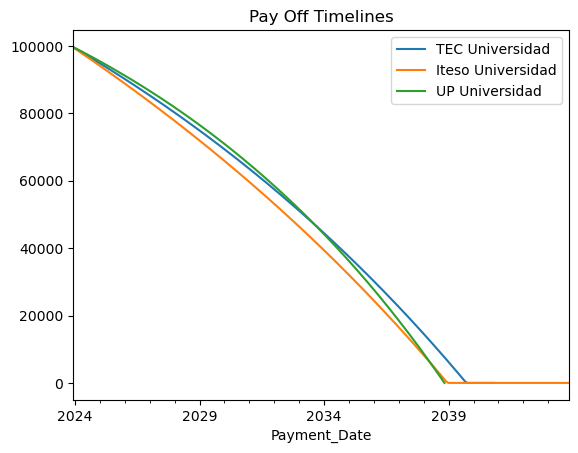

In [154]:
fig, ax = plt.subplots(1, 1)
schedule1.plot(x='Payment_Date', y='Curr_Balance', label="TEC Universidad", ax=ax)
schedule2.plot(x='Payment_Date', y='Curr_Balance', label="Iteso Universidad", ax=ax)
schedule3.plot(x='Payment_Date', y='Curr_Balance', label="UP Universidad", ax=ax)
plt.title("Pay Off Timelines")

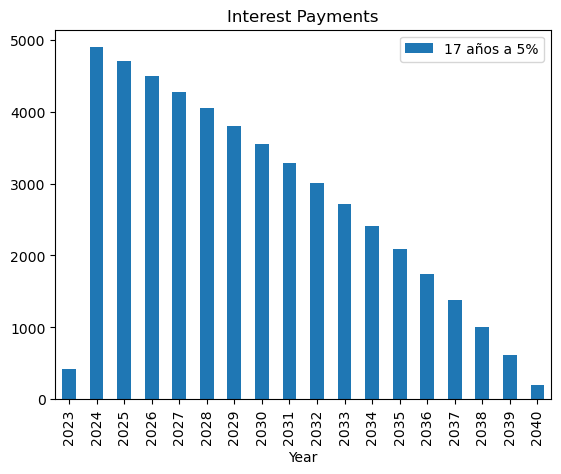

In [155]:
fig, ax = plt.subplots(1, 1)

y1_schedule = schedule1.set_index('Payment_Date').resample("A")["Interest"].sum().abs().reset_index()
y1_schedule["Year"] = y1_schedule["Payment_Date"].dt.year
y1_schedule.plot(kind="bar", x="Year", y="Interest", ax=ax, label="17 años a 5%")

plt.title("Interest Payments");



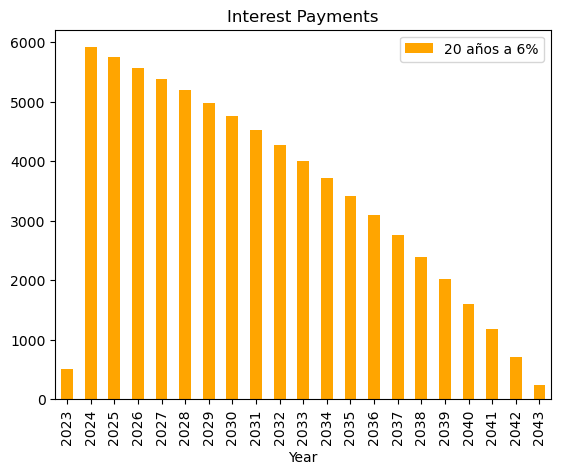

In [156]:
df2 = fig, ax = plt.subplots(1, 1)

y2_schedule = schedule2.set_index('Payment_Date').resample("A")["Interest"].sum().abs().reset_index()
y2_schedule["Year"] = y2_schedule["Payment_Date"].dt.year
y2_schedule.plot(kind="bar", x="Year", y="Interest", ax=ax, color = 'orange', label="20 años a 6%")

plt.title("Interest Payments");

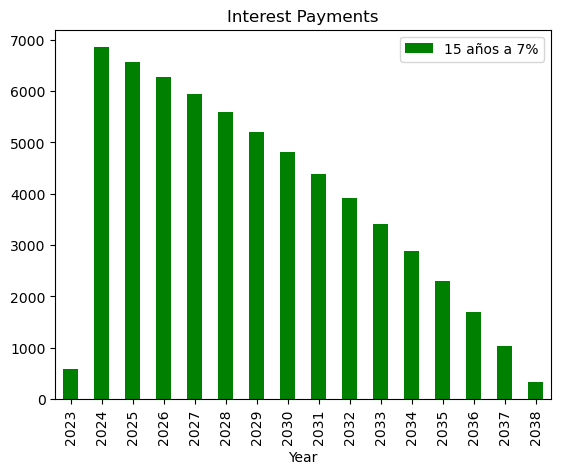

In [157]:
fig, ax = plt.subplots(1, 1)

y3_schedule = schedule3.set_index('Payment_Date').resample("A")["Interest"].sum().abs().reset_index()
y3_schedule["Year"] = y3_schedule["Payment_Date"].dt.year
y3_schedule.plot(kind="bar", x="Year", y="Interest", ax=ax, color = 'green', label="15 años a 7%")

plt.title("Interest Payments");

<Axes: xlabel='Year'>

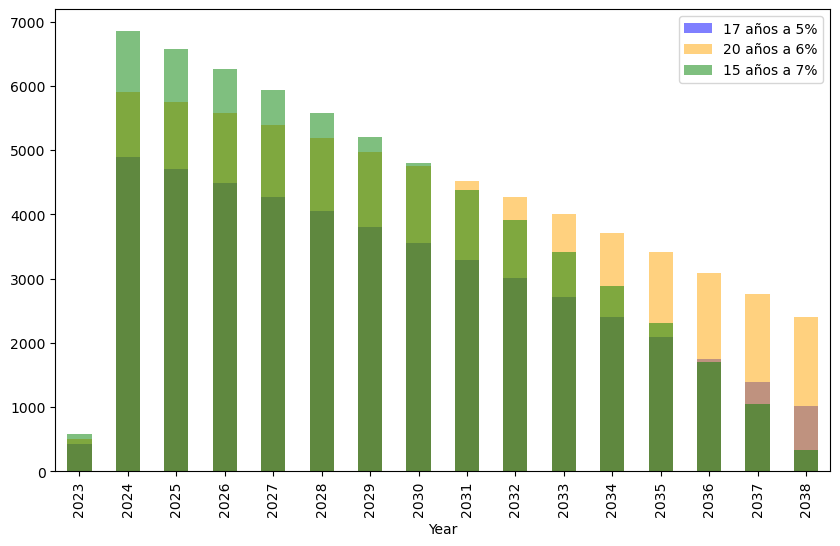

In [161]:
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

y1_schedule.plot(kind="bar", x="Year", y="Interest", ax=ax, label="17 años a 5%", color='blue', alpha = 0.5)
y2_schedule.plot(kind="bar", x="Year", y="Interest", ax=ax, label="20 años a 6%", color='orange', alpha = 0.5)
y3_schedule.plot(kind="bar", x="Year", y="Interest", ax=ax, label="15 años a 7%", color='green', alpha = 0.5)


## 2.1 Ecuaciones Diferenciales
> Se busca solucionar e interpretar los resultados de 3 ecuaciones diferenciales comprendidas dentro del mismo modelo.

### 2.2 Introducción - Modelo de Vasicek para determinación de Tasas de Interés
> El modelo de Vasicek es un modelo que busca predecir la tasa de interés al final de un periódo de tiempo tomando en cuenta el riesgo del mercado. Este modelo fue propuesto en 1977, por lo que luego de que se introdujera, se expandió sobre el mismo y se generaron más modelos que buscaban resolver áreas de oportunidad del orginal.


### 2.3 Objetivos.
> - Solucionar las tres ecuaciones del Modelo de Vasicek utilizando Python. (Modelo original, modelo exponencial y modelo exponencial extendido.
> - Interpretar la solución y experimentar con los parámetros para concluir de manera profunda el propósito del modelo.
> - Encontrar y recomendar áreas de oportunidad para el proyecto.

### Modelo de Vasicek
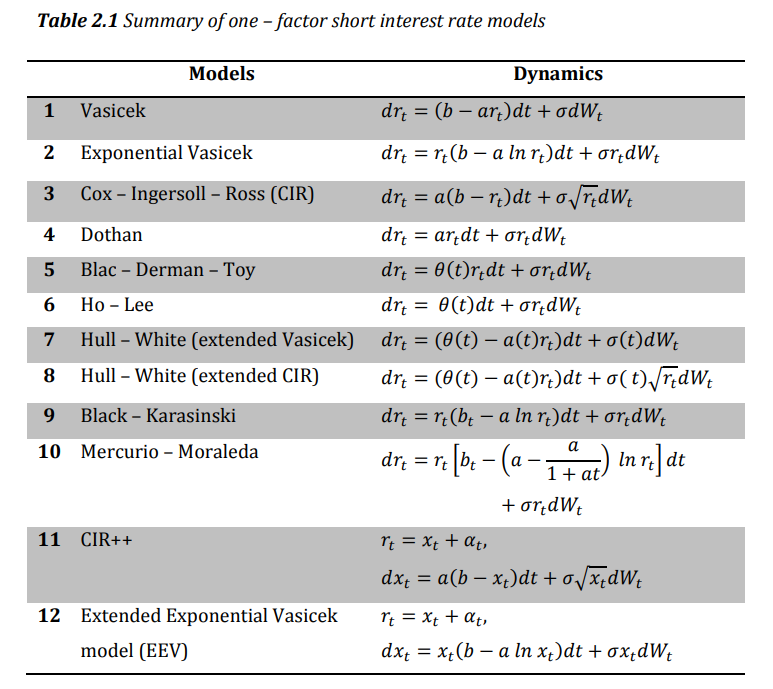

Existen diversas ecuaciones que conforman el modelo de Vasicek, que como fue mencionado anteriormente, toma en cuenta varios parámetros del mercado y situación económica actual para poder predecir la tasa de interés de corto plazo. Sin embargo, cada modelo tiene sus deficiencias, ventajas, y limitaciones, por ello se abordan desde distintios puntos de vista, y dependiendo de los parámetros sobre los cuales se quiera estudiar un dado problema, se elige un modelo por encima de otros.

### Modelo Vasicek - \$ dr(t) = a(b - r(t))dt + \sigma dW(t) \$
> - Proporciona una descripción intuitiva de la reversión a la media de las tasas de interés. Puede ser utilizado para valorar instrumentos financieros y gestionar el riesgo de tasas de interés.
> -El modelo asume que la volatilidad es constante, lo cual puede no reflejar con precisión la realidad de los mercados financieros. La tasa de reversión y la volatilidad son constantes en el tiempo, lo que podría no capturar completamente la complejidad de la dinámica de las tasas de interés.

### Modelo Exponencial de Vasicek - \$ dr(t) = a(e^{-br(t)} - r(t))dt + \sigma e^{-br(t)/2} dW(t) \$
> - Introduce un componente exponencial en la tasa de reversión, permitiendo una mayor flexibilidad en la modelización de las tasas de interés. Puede capturar mejor la dinámica de tasas de interés que no siguen una reversión constante a la media.
> - Aunque más flexible que el modelo original de Vasicek, aún tiene limitaciones en términos de complejidad y capacidad para capturar comportamientos extremos del mercado. La calibración de los parámetros puede ser complicada y depende de la calidad y disponibilidad de los datos.

### Modelo Exponencial Extendido de Vasicek - 
$ dr(t) = a(e^{-br(t)} - c - dr(t))dt + \sigma e^{-br(t)/2} dW(t) \$


\$ dc(t) = k(c - dc(t))dt + \zeta e^{-b'c(t)/2} dZ(t) \$
> - Introduce la capacidad de modelar estocásticamente tanto la tasa de interés como la tasa de reversión, lo que puede mejorar la captura de la dinámica real del mercado. Permite modelar no solo la tasa de interés, sino también la tasa de reversión de manera más flexible.
> - Aumenta la complejidad del modelo, lo que puede dificultar su implementación y calibración. La elección y estimación de los parámetros adicionales (como la tasa de reversión de la tasa de reversión) puede ser más desafiante y dependerá de la disponibilidad de datos.

### Explicación de los Parámetros

1. **Modelo de Vasicek:**
   \$ dr(t) = a(b - r(t))dt + \sigma dW(t) \$

   Donde:
   - \( r(t) \): Tasa de interés en el tiempo \( t \).
   - \( a \): Tasa de reversión, que mide cuán rápido la tasa de interés vuelve hacia su media de largo plazo.
   - \( b \): Nivel de reversión, es la media de largo plazo a la que la tasa de interés converge.
   - \( $\sigma \$): Volatilidad, representa la variabilidad estocástica de la tasa de interés.
   - \( dW(t) \): Elemento diferencial de un proceso estocástico conocido como movimiento browniano.
   

2. **Modelo Exponencial de Vasicek:**
   \$ dr(t) = a(e^{-br(t)} - r(t))dt + \sigma e^{-br(t)/2} dW(t) \$

   Además de los parámetros del Modelo de Vasicek, se añade:
   - \$( e^{-br(t)} $\): Componente exponencial en la tasa de reversión, permitiendo una dinámica exponencial.


3. **Modelo Exponencial Extendido de Vasicek:**
   
   
   \$ dr(t) = a(e^{-br(t)} - c - dr(t))dt + \sigma e^{-br(t)/2} dW(t) \$
   
   
   
   \$ dc(t) = k(c - dc(t))dt + \zeta e^{-b'c(t)/2} dZ(t) \$

   Además de los parámetros del Modelo Exponencial de Vasicek, se añaden:
   - \( c(t) \): Tasa de reversión en el tiempo \( t \).
   - \( k \): Tasa de reversión para el componente \( c(t) \), mide cuán rápido \( c(t) \) vuelve hacia su media de largo plazo.
   - \( b' \): Parámetro adicional en el componente exponencial de \( c(t) \), permitiendo una dinámica exponencial para la tasa de reversión \( c(t) \).
   - \( $\zeta \$): Volatilidad para el componente \( c(t) \), representa la variabilidad estocástica de la tasa de reversión.
   - \( dZ(t) \): Elemento diferencial de otro proceso estocástico.

## Solución

In [117]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [118]:
# Parámetros del Modelo de Vasicek
a = 0.1
b = 0.04
sigma = 0.02

# Parámetros del Modelo Exponencial de Vasicek
a_exp = 0.1
b_exp = 0.04
sigma_exp = 0.02

# Parámetros del Modelo Exponencial Extendido de Vasicek
a_ext = 0.1
b_ext = 0.04
sigma_ext = 0.02
k_ext = 0.1

In [119]:
# Sistema de ecuaciones diferenciales para el Modelo de Vasicek
def vasicek_model(r, t):
    drdt = a * (b - r) + sigma * np.random.normal(0, 1)
    return drdt

# Sistema de ecuaciones diferenciales para el Modelo Exponencial de Vasicek
def exp_vasicek_model(r, t):
    drdt = a_exp * (np.exp(-b_exp*r) - r) + sigma_exp * np.exp(-b_exp*r/2) * np.random.normal(0, 1)
    return drdt

# Sistema de ecuaciones diferenciales para el Modelo Exponencial Extendido de Vasicek
def exp_ext_vasicek_model(variables, t):
    r, c = variables
    drdt = a_ext * (np.exp(-b_ext*r) - c - r) + sigma_ext * np.exp(-b_ext*r/2) * np.random.normal(0, 1)
    dcdt = k_ext * (c - r)
    return [drdt, dcdt]

In [120]:
# Condiciones iniciales
r0 = 0.04
c0 = 0.04

In [121]:
# Definir el intervalo de tiempo
t = np.linspace(0, 1, 10000)

In [126]:
# Resolver el sistema de ecuaciones diferenciales para cada modelo
solution_vasicek = odeint(vasicek_model, r0, t)
solution_exp_vasicek = odeint(exp_vasicek_model, r0, t)
solution_exp_ext_vasicek = odeint(exp_ext_vasicek_model, [r0, c0], t)


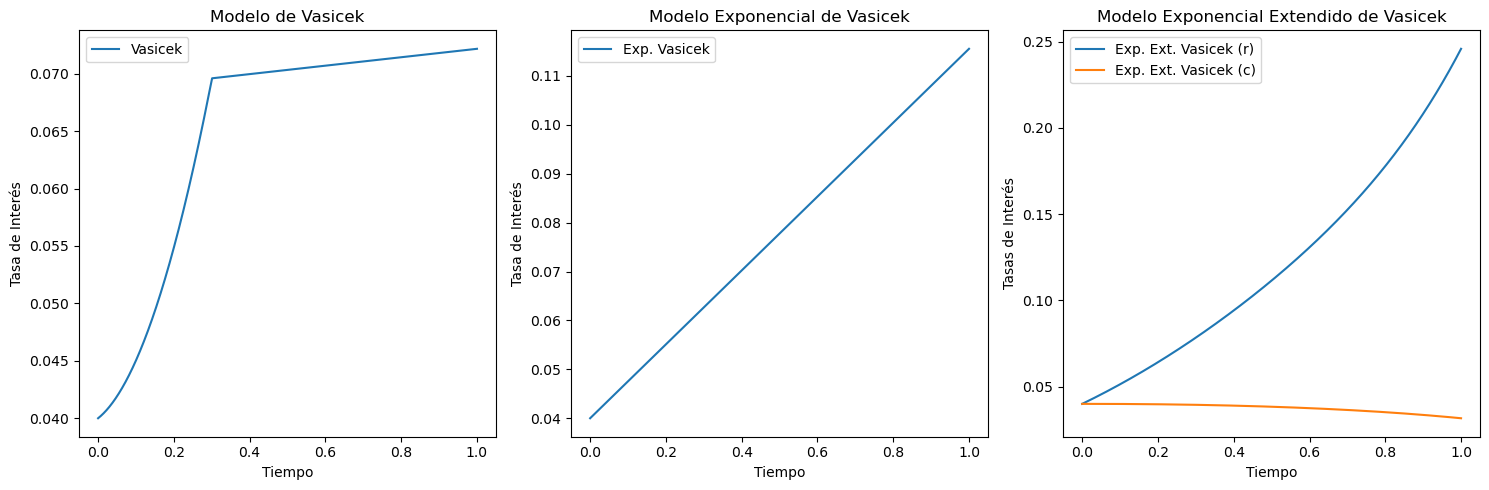

In [127]:
# Visualizar los resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(t, solution_vasicek, label='Vasicek')
plt.xlabel('Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Modelo de Vasicek')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(t, solution_exp_vasicek, label='Exp. Vasicek')
plt.xlabel('Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Modelo Exponencial de Vasicek')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(t, solution_exp_ext_vasicek[:, 0], label='Exp. Ext. Vasicek (r)')
plt.plot(t, solution_exp_ext_vasicek[:, 1], label='Exp. Ext. Vasicek (c)')
plt.xlabel('Tiempo')
plt.ylabel('Tasas de Interés')
plt.title('Modelo Exponencial Extendido de Vasicek')
plt.legend()

plt.tight_layout()
plt.show()

### Si jugamos con los parámetros...

In [128]:
# Parámetros del Modelo de Vasicek
a = 0.05 #Reducimos tasa de reversión
b = 0.09 #Aumentamos hacia donde converge la tasa
sigma = 0.035 #Aumentamos la volatilidad

# Parámetros del Modelo Exponencial de Vasicek
a_exp = 0.05 #Reducimos tasa de reversión
b_exp = 0.09 #Aumentamos hacia donde converge la tasa
sigma_exp = 0.035 #Aumentamos la volatilidad

# Parámetros del Modelo Exponencial Extendido de Vasicek
a_ext = 0.05 #Reducimos tasa de reversión
b_ext = 0.09 #Aumentamos hacia donde converge la tasa
sigma_ext = 0.035 #Aumentamos la volatilidad
k_ext = 0.05 #Reducimos tasa de reversión

In [129]:
# Condiciones iniciales - Ajustamos a una tasa mayor (7%)
r0 = 0.07
c0 = 0.07

In [138]:
# Resolver el sistema de ecuaciones diferenciales para cada modelo
solution_vasicek = odeint(vasicek_model, r0, t)
solution_exp_vasicek = odeint(exp_vasicek_model, r0, t)
solution_exp_ext_vasicek = odeint(exp_ext_vasicek_model, [r0, c0], t)


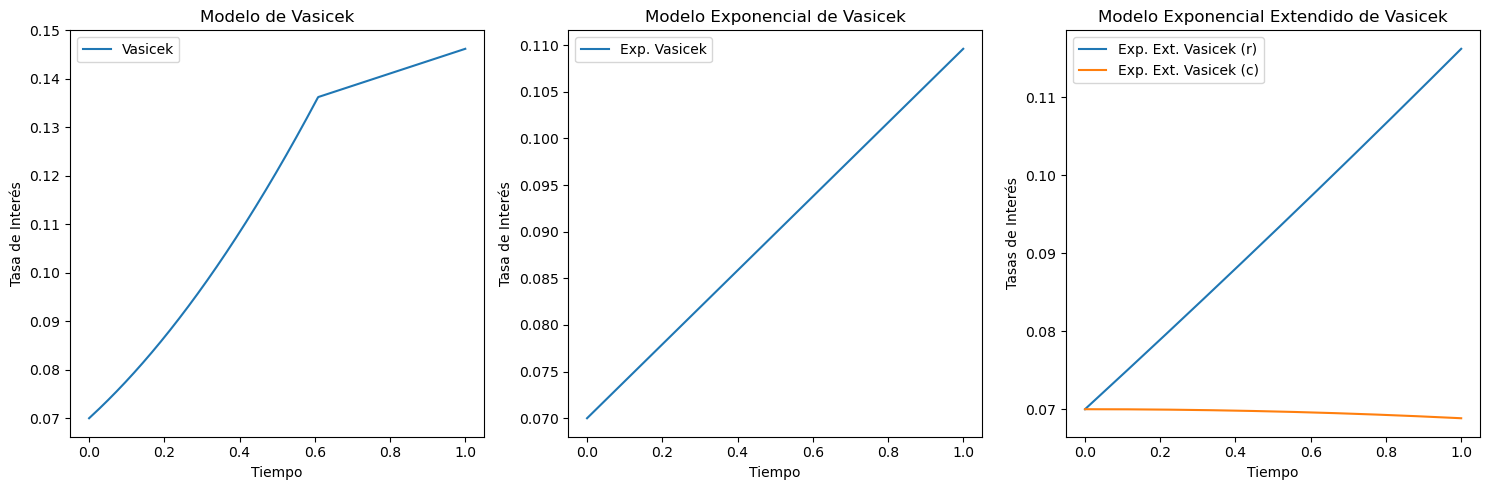

In [139]:
# Visualizar los resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(t, solution_vasicek, label='Vasicek')
plt.xlabel('Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Modelo de Vasicek')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(t, solution_exp_vasicek, label='Exp. Vasicek')
plt.xlabel('Tiempo')
plt.ylabel('Tasa de Interés')
plt.title('Modelo Exponencial de Vasicek')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(t, solution_exp_ext_vasicek[:, 0], label='Exp. Ext. Vasicek (r)')
plt.plot(t, solution_exp_ext_vasicek[:, 1], label='Exp. Ext. Vasicek (c)')
plt.xlabel('Tiempo')
plt.ylabel('Tasas de Interés')
plt.title('Modelo Exponencial Extendido de Vasicek')
plt.legend()

plt.tight_layout()
plt.show()

## Conclusiones

> A pesar de que los modelos involucran ecuaciones diferenciales, la calidad de las mismas es más compleja de las vistas en clase, debido a que incorporan factores estocásticos en la misma, por lo que las principales dos áreas de oportunidad del proyecto involucran el plantear de manera más trazable el movimiento browniano, así como se debe ver este programa como una simyulación, de la cual se puede repetir muchas veces, obtener una tendencia y a partir de esos datos proveer una conclusión más certera.

> Cada acercamiento al modelo agrega una capa adicional de complejidad, y a su vez de precisión para el objetivo que se busca, siempre y cuando se analice correctamente a qué capa de complejidad se quiere llegar.

> Sin embargo, el proyecto otrorga claridad acerca de lo qué es una ecuación diferencial, y como se puede buscar solucionar dependiendo de los parámetros que le demos a la misma ecuación.


Fuentes: Mukendi, M. (2013). Pricing european and American bond options under the hull-white ... Semantic Scholar. https://www.semanticscholar.org/paper/Pricing-European-and-American-bond-options-under-Mpanda/3026a4d484e266422d958e04f6e3eefe7d785a9b 